# Group 96 [Raza Abbas, Alkesh Chaturvedi, Harsh Bhatia]

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import statistics
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# 1. Import the data from Iris Dataset (Links to an external site.) (1 point)
import the data from iris dataset & assign url of the file

In [2]:
iris = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
urlretrieve(iris)

('C:\\Users\\ealkcha\\AppData\\Local\\Temp\\tmpwm93a7c5',
 <http.client.HTTPMessage at 0x2563c2b3310>)

Observation: saves the file locally

In [4]:
df=pd.read_csv(iris,sep=',',names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Observation: file is opened as data frame, first four columns are attributes and last column is class variable

In [6]:
# display first 5 records with headers & shape
df.head(), df.shape

(   sepal_length  sepal_width  petal_length  petal_width        class
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa,
 (150, 5))

Observation: Displays the first 5 rows. Data has 150 rows and 5 columns

In [7]:
# check the data types of each attibutes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observation: Displays the data type of each variable - attributes are float and class variable is qualitative data type; there
    are no null values in the data    

# 2. Consider all columns as independent variables and assign to variable X except the last column and consider the last column as dependent variable and assign to variable y. (1 point)
Print the first 5 records to check Variable X & Y

In [8]:
X=df.iloc[:,0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Observation: Variable X is assigned to the first four columns

In [9]:
Y=df.iloc[:,-1:]
Y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


Observation: Variable Y is assigned to the last columns

# 3. Remove columns which don’t help the problem statement. (1 point)

In [10]:
# To get a correlation we need to convert our categorical variable into numerical one
df["class"] =df["class"].astype('category').cat.codes

In [11]:
df["class"].dtype

dtype('int8')

Observation: Data type of the the Dependent variable changed from categorical to numeric

In [12]:
# Check correlation among independent variables and also between dependent variable and each of the independent variables
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


Observation: Correlation table shows high correlation among sepal_length, petal_length & petal_width. These varaibles also have high correlation with dependent variable

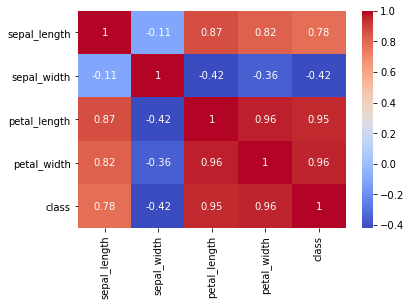

In [13]:
# Plot heat map to visualize corelation among the variables
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

Observation: Heat map provides visual display of correclation and reconfirms - high correlation among sepal_length, petal_length & petal_width. These varaibles also have high correlation with dependent variable

In [14]:
df=df[["sepal_width","petal_width","class"]]
df.head()

,sepal_width,petal_width,class
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0


Observation: Displays data post removal of two variables - sepal_length and petal_length

# 4. Compute some basic statistical details like percentile, mean, standard deviation of dataset (1 point)

In [15]:
stat = df.describe()

In [16]:
stat

,sepal_width,petal_width,class
count,150.000000,150.000000,150.000000
mean,3.054000,1.198667,1.000000
std,0.433594,0.763161,0.819232
min,2.000000,0.100000,0.000000
25%,2.800000,0.300000,0.000000
50%,3.000000,1.300000,1.000000
75%,3.300000,1.800000,2.000000
max,4.400000,2.500000,2.000000


Observation: From above statistics, we conclude the following:
(1) Presence of outlier in sepal width as max entry is greater than mean+3*std
(2) petal width seems to have slight skewness as seen from the mean and median values however there are no outliers

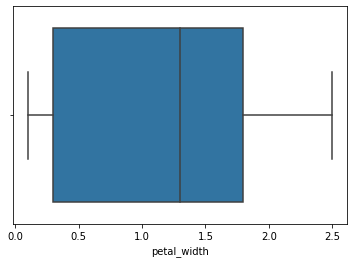

In [17]:
sns.boxplot(x=df['petal_width'])

Observation: Box plot shows Petal Width data is left skewed but no outliers in the data

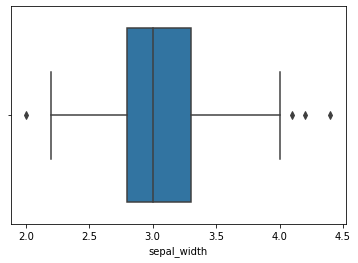

In [18]:
sns.boxplot(x=df['sepal_width'])

# 5. Encode all the categorical columns into numeric (1 point)

df["class"] =df["class"].astype('category').cat.codes

Above code was used earlier in the program to convert categorical variable ("class") into numeric. 
The variable is now numeric can be verified as below:

In [19]:
# df["class"] =df["class"].astype('category').cat.codes <Command used earlier in the program to encode categorical column into numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_width  150 non-null    float64
 1   petal_width  150 non-null    float64
 2   class        150 non-null    int8   
dtypes: float64(2), int8(1)
memory usage: 2.6 KB


Observation: As given above, the class variable is "int". this was categorical variable that we converted to "int" while finding the corrleation among the variables. The command used for this conversion was:
df["class"] =df["class"].astype('category').cat.codes

# 6. Do Feature Scaling on Independent variables (2 points)

In [20]:
X=df.iloc[:,0:2]
X.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


Observation: Above detail shows that scales of two attributes sepal_width and petal width are significantly different 

In [21]:
sc = StandardScaler()
X = sc.fit_transform(X)
X[:10]

array([[ 1.03205722, -1.31297673],
       [-0.1249576 , -1.31297673],
       [ 0.33784833, -1.31297673],
       [ 0.10644536, -1.31297673],
       [ 1.26346019, -1.31297673],
       [ 1.95766909, -1.05003079],
       [ 0.80065426, -1.18150376],
       [ 0.80065426, -1.31297673],
       [-0.35636057, -1.31297673],
       [ 0.10644536, -1.4444497 ]])

Observation: Two attributes are scaled as seen above

# 7. Split the data into train and test dataset (1 point)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=22)

In [23]:
X_train.shape

(120, 2)

In [24]:
Y_train.shape

(120, 1)

In [25]:
X_test.shape

(30, 2)

In [26]:
Y_test.shape

(30, 1)

Observation: 150 records are split into train and test data in the ratio of 80:20 randomly

# 8. Use sklearn library to train on train dataset on decision tree and predict on test dataset  (3 points)

In [27]:
classifier = DecisionTreeClassifier()

In [28]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

Observation: model is trained on the training data using the sklearn library

In [29]:
Y_pred = classifier.predict(X_test)

Observation: prediction is done on the test data

# 9. Compute the accuracy and precision. (2 points)

In [30]:
print(confusion_matrix(Y_test, Y_pred))

[[ 6  0  0]
 [ 0  8  2]
 [ 0  2 12]]


Observation: Confution matrix is displayed as above

In [31]:
accuracy_score(Y_test, Y_pred)

0.8666666666666667

Observation: Model accuracy is 86.6%

In [32]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.80      0.80      0.80        10
 Iris-virginica       0.86      0.86      0.86        14

       accuracy                           0.87        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.87      0.87      0.87        30



Observation: Precision, recall and f1-score are tabulated as above. All the parameters have values greater than 80% indicating reasonable performance for the model